In [2]:
#imports
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
#reading the preprocessed data - (output of phase 1)
data = pd.read_csv('../data/processed/cleaned_data.csv')

In [4]:
#checking data entry upto 2022
data.tail(5)

,raceId,season,raceNumber,prixName,raceDate,driverId,constructorId,driverStartGridPos,driverFinalGridPos,driverFinalRank,driverRacePoints,driverLapCount,driverFatestLapNumber,driverFastestLapTime,driverFastestLapSpeed,constructorRacePoints,driverNumber,driverDateOfBirth,driverNationality,constructorName,constructorNationality,constructorChampionshipStandingPoints,constructorChampionshipStandingPosition,constructorChampionshipStandingWins,driverChampionshipStandingPoints,driverChampionshipStandingPosition,driverChampionshipStandingWins,circuitName,circuitLocation,circuitCountry,driverRaceResultStatus,driverName,driverAge,driverDnf,constructorDnf
6990,1096,2022,22,Abu Dhabi Grand Prix,2022-11-20,854,210,12,16.0,16,0.0,57.0,39.0,1:29.833,211.632,0.0,47.0,1999-03-22,German,Haas F1 Team,American,37.0,8.0,0.0,12.0,16.0,0.0,Yas Marina Circuit,Abu Dhabi,UAE,+1 Lap,Mick Schumacher,24.0,0,1
6991,1096,2022,22,Abu Dhabi Grand Prix,2022-11-20,825,210,16,17.0,17,0.0,57.0,40.0,1:31.158,208.556,0.0,20.0,1992-10-05,Danish,Haas F1 Team,American,37.0,8.0,0.0,25.0,13.0,0.0,Yas Marina Circuit,Abu Dhabi,UAE,+1 Lap,Kevin Magnussen,30.0,0,1
6992,1096,2022,22,Abu Dhabi Grand Prix,2022-11-20,1,131,5,18.0,18,0.0,55.0,42.0,1:29.788,211.738,10.0,44.0,1985-01-07,British,Mercedes,German,515.0,3.0,1.0,240.0,6.0,0.0,Yas Marina Circuit,Abu Dhabi,UAE,Hydraulics,Lewis Hamilton,38.0,0,1
6993,1096,2022,22,Abu Dhabi Grand Prix,2022-11-20,849,3,20,19.0,19,0.0,55.0,45.0,1:30.309,210.517,0.0,6.0,1995-06-29,Canadian,Williams,British,8.0,10.0,0.0,2.0,20.0,0.0,Yas Marina Circuit,Abu Dhabi,UAE,Collision damage,Nicholas Latifi,28.0,0,1
6994,1096,2022,22,Abu Dhabi Grand Prix,2022-11-20,4,214,10,0.0,20,0.0,27.0,24.0,1:30.579,209.889,6.0,14.0,1981-07-29,Spanish,Renault,French,173.0,4.0,0.0,81.0,9.0,0.0,Yas Marina Circuit,Abu Dhabi,UAE,Water leak,Fernando Alonso,42.0,0,1


In [5]:
#checking all features present
data.columns

Index(['raceId', 'season', 'raceNumber', 'prixName', 'raceDate', 'driverId',
       'constructorId', 'driverStartGridPos', 'driverFinalGridPos',
       'driverFinalRank', 'driverRacePoints', 'driverLapCount',
       'driverFatestLapNumber', 'driverFastestLapTime',
       'driverFastestLapSpeed', 'constructorRacePoints', 'driverNumber',
       'driverDateOfBirth', 'driverNationality', 'constructorName',
       'constructorNationality', 'constructorChampionshipStandingPoints',
       'constructorChampionshipStandingPosition',
       'constructorChampionshipStandingWins',
       'driverChampionshipStandingPoints',
       'driverChampionshipStandingPosition', 'driverChampionshipStandingWins',
       'circuitName', 'circuitLocation', 'circuitCountry',
       'driverRaceResultStatus', 'driverName', 'driverAge', 'driverDnf',
       'constructorDnf'],
      dtype='object')

In [6]:
data.tail(5)

,raceId,season,raceNumber,prixName,raceDate,driverId,constructorId,driverStartGridPos,driverFinalGridPos,driverFinalRank,driverRacePoints,driverLapCount,driverFatestLapNumber,driverFastestLapTime,driverFastestLapSpeed,constructorRacePoints,driverNumber,driverDateOfBirth,driverNationality,constructorName,constructorNationality,constructorChampionshipStandingPoints,constructorChampionshipStandingPosition,constructorChampionshipStandingWins,driverChampionshipStandingPoints,driverChampionshipStandingPosition,driverChampionshipStandingWins,circuitName,circuitLocation,circuitCountry,driverRaceResultStatus,driverName,driverAge,driverDnf,constructorDnf
6990,1096,2022,22,Abu Dhabi Grand Prix,2022-11-20,854,210,12,16.0,16,0.0,57.0,39.0,1:29.833,211.632,0.0,47.0,1999-03-22,German,Haas F1 Team,American,37.0,8.0,0.0,12.0,16.0,0.0,Yas Marina Circuit,Abu Dhabi,UAE,+1 Lap,Mick Schumacher,24.0,0,1
6991,1096,2022,22,Abu Dhabi Grand Prix,2022-11-20,825,210,16,17.0,17,0.0,57.0,40.0,1:31.158,208.556,0.0,20.0,1992-10-05,Danish,Haas F1 Team,American,37.0,8.0,0.0,25.0,13.0,0.0,Yas Marina Circuit,Abu Dhabi,UAE,+1 Lap,Kevin Magnussen,30.0,0,1
6992,1096,2022,22,Abu Dhabi Grand Prix,2022-11-20,1,131,5,18.0,18,0.0,55.0,42.0,1:29.788,211.738,10.0,44.0,1985-01-07,British,Mercedes,German,515.0,3.0,1.0,240.0,6.0,0.0,Yas Marina Circuit,Abu Dhabi,UAE,Hydraulics,Lewis Hamilton,38.0,0,1
6993,1096,2022,22,Abu Dhabi Grand Prix,2022-11-20,849,3,20,19.0,19,0.0,55.0,45.0,1:30.309,210.517,0.0,6.0,1995-06-29,Canadian,Williams,British,8.0,10.0,0.0,2.0,20.0,0.0,Yas Marina Circuit,Abu Dhabi,UAE,Collision damage,Nicholas Latifi,28.0,0,1
6994,1096,2022,22,Abu Dhabi Grand Prix,2022-11-20,4,214,10,0.0,20,0.0,27.0,24.0,1:30.579,209.889,6.0,14.0,1981-07-29,Spanish,Renault,French,173.0,4.0,0.0,81.0,9.0,0.0,Yas Marina Circuit,Abu Dhabi,UAE,Water leak,Fernando Alonso,42.0,0,1


In [7]:
#selecting features depending on correlation matrix from EDA performed in Phase 1
features = ['season','driverId','constructorId', 'driverStartGridPos', 
            'driverFinalGridPos', 'driverChampionshipStandingPosition', 
            'constructorChampionshipStandingPosition']

#Dropping unnecessary features and setting target variable - driver ranking in each race
X = data[features]
y = data['driverFinalRank']

# split dataset into training(80%) and testing sets (20%) and stratifying over season
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=data['season'])

# Scale the features to ensure all features are at same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the parameter grid for hyperparameter optimization for rfc
param_grid = {'n_estimators': [50, 100, 200, 300, 400, 500],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [10, 20, 30, 40, 50, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Creating the Random Forest Classifier with default parameters
rf = RandomForestClassifier(random_state=42)

# Applying the RandomizedSearchCV to search for the best hyperparameters
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, 
                               cv=5, verbose=2, random_state=42, n_jobs=-1)

# Training the Random Forest Classifier on the training data with the optimized hyperparameters
rf_random.fit(X_train_scaled, y_train)

# Getting the best hyperparameters and using them to create the final model
best_params = rf_random.best_params_
model = RandomForestClassifier(random_state=42, **best_params)
model.fit(X_train_scaled, y_train)

# Making predictions on the testing data
y_pred1 = model.predict(X_test_scaled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/dhvani/opt/anaconda3/envs/DIC/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/dhvani/opt/anaconda3/envs/DIC/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/dhvani/opt/anaconda3/envs/DIC/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=

/Users/dhvani/opt/anaconda3/envs/DIC/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/dhvani/opt/anaconda3/envs/DIC/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/dhvani/opt/anaconda3/envs/DIC/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=

/Users/dhvani/opt/anaconda3/envs/DIC/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/dhvani/opt/anaconda3/envs/DIC/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/dhvani/opt/anaconda3/envs/DIC/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=

/Users/dhvani/opt/anaconda3/envs/DIC/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/dhvani/opt/anaconda3/envs/DIC/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/dhvani/opt/anaconda3/envs/DIC/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=

/Users/dhvani/opt/anaconda3/envs/DIC/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/dhvani/opt/anaconda3/envs/DIC/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/dhvani/opt/anaconda3/envs/DIC/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=

/Users/dhvani/opt/anaconda3/envs/DIC/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/dhvani/opt/anaconda3/envs/DIC/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/dhvani/opt/anaconda3/envs/DIC/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=

/Users/dhvani/opt/anaconda3/envs/DIC/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/dhvani/opt/anaconda3/envs/DIC/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/dhvani/opt/anaconda3/envs/DIC/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=

In [8]:
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}


In [9]:
# Evaluating the accuracy of the RFC classifier
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy: ", accuracy)

Accuracy:  0.8320228734810579


In [10]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
print(results.head(25))

      Actual  Predicted
2778       5          5
3962      10         10
616        9          9
5161       7          7
1902      17         17
588        1          1
3387      12         12
2967      10         10
3612      17         17
765       14         14
412        7          7
5704      10         10
4429       5          5
5302       8          8
1746       5          5
5945      11         11
4477       9          9
5419       5          5
6177       3          3
704       17         17
696        9          9
4221      17         17
5650      16         16
382       21         20
3626       9          9


In [11]:
#Checking actual vs predicted values
not_matching = results[results['Actual'] != results['Predicted']].shape[0]
print("Number of values not matching:", not_matching)

Number of values not matching: 235


In [12]:
# Calculating classification report
cr = classification_report(y_test, y_pred1)
print(cr)

              precision    recall  f1-score   support

           1       0.87      0.97      0.92        64
           2       0.96      0.98      0.97        54
           3       0.95      1.00      0.98        61
           4       0.88      1.00      0.93        71
           5       0.95      0.99      0.97        73
           6       1.00      0.99      0.99        70
           7       0.98      1.00      0.99        59
           8       1.00      1.00      1.00        77
           9       1.00      1.00      1.00        58
          10       1.00      0.98      0.99        64
          11       0.99      1.00      0.99        72
          12       0.97      0.99      0.98        73
          13       1.00      0.99      0.99        72
          14       0.98      0.95      0.96        58
          15       0.95      0.83      0.89        70
          16       0.90      0.77      0.83        71
          17       0.86      0.58      0.69        62
          18       0.48    

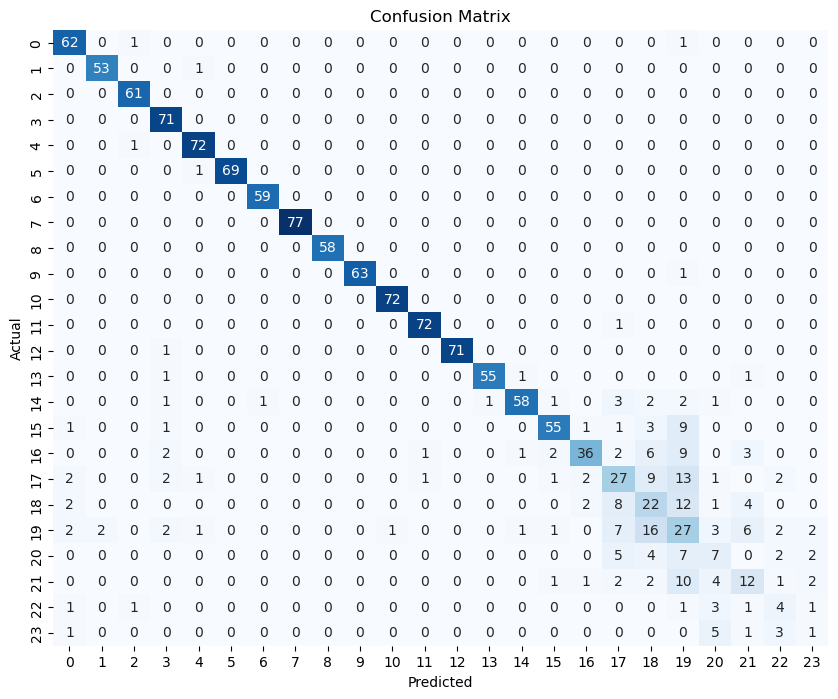

In [13]:
# Generating confusion matrix
cm = confusion_matrix(y_test, y_pred1)

# Plotting confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


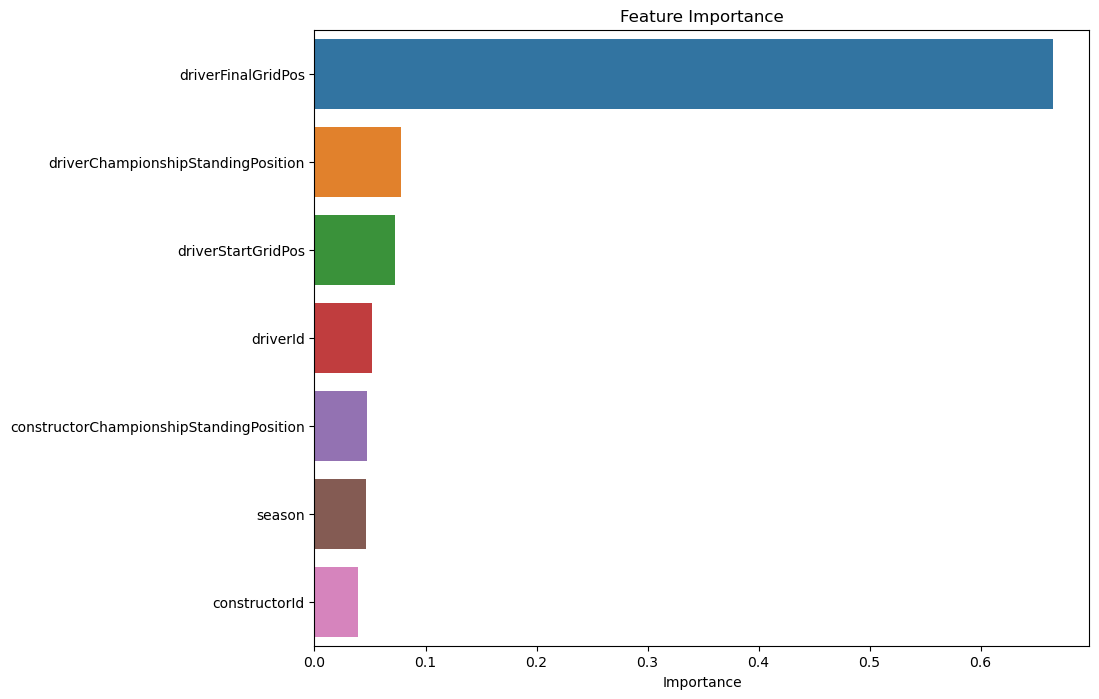

[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   4.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.8s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, max_

[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   4.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.8s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=40, max_fe

[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   4.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   3.2s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   3.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   5.6s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, max_features=a

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   2.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   2.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   3.1s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   3.3s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.6s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.7s
[CV] END max_depth=50, max_feature

[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   4.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   3.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   3.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   5.5s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=50, max_features=

In [14]:
# Plotting feature importance
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()
